In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from os import listdir, makedirs
from os.path import join, exists, expanduser
from tqdm import tqdm
from sklearn.metrics import log_loss, accuracy_score, f1_score, confusion_matrix
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications import xception
from keras.applications import inception_v3
from keras.applications.vgg16 import preprocess_input, decode_predictions
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
compare_loss={}
compare_accuracy={}
import os
import cv2
from glob import glob
import sklearn.ensemble
import seaborn as sns

In [22]:
data_dir = 'C:/Users/muthumn/machine-learning-master/seedlings-pretrained-keras-models/input'
data_pretrain = 'C:/Users/muthumn/machine-learning-master/seedlings-pretrained-keras-models/input/keras-pretrained-models'
data_test = 'C:/Users/muthumn/machine-learning-master/seedlings-pretrained-keras-models/input/test'
data_save_model = 'C:/Users/muthumn/machine-learning-master/seedlings-pretrained-keras-models/saved_models'


In [23]:
train_dir = "C:/Users/muthumn/machine-learning-master/seedlings-pretrained-keras-models/input/train"
valid_dir = "C:/Users/muthumn/machine-learning-master/seedlings-pretrained-keras-models/input/valid"
keras_dir='C:/Users/muthumn/.keras/models'


In [24]:
# data_dir = 'C:/Users/muthumn/machine-learning-master/seedlings-pretrained-keras-models/input/'
# train_dir = os.path.join(data_dir, 'train')

In [25]:
train_dir

'C:/Users/muthumn/machine-learning-master/seedlings-pretrained-keras-models/input/train'

In [26]:
# check if all pre trained models are present
start = dt.datetime.now()

In [27]:

cache_dir = expanduser(join('~', '.keras'))
if not exists(cache_dir):
    makedirs(cache_dir)
models_dir = join(cache_dir, 'models')
if not exists(models_dir):
    makedirs(models_dir)

In [28]:
# function to convert image to array
def read_img(address, size):
    """Read and resize image.
    Returns Image as numpy array, by normalizing the values
    """
    img = image.load_img(os.path.join(data_dir, filepath), target_size=size)
#    img = image.load_img(address, target_size=size)
    img = image.img_to_array(img)
    return img

# function to convert labels to one hot encoding vector
def OneHotEncoded(y_train):
    y_t=np.zeros((len(y_train),Num_Class), dtype=int)
    for i,x in enumerate(y_train):
        y_t[i][int(x)-1]=1
    return y_t

In [80]:
species = ['Black-grass', 'Charlock', 'Cleavers', 'Common Chickweed', 'Common wheat',
           'Fat Hen', 'Loose Silky-bent', 'Maize', 'Scentless Mayweed',
           'Shepherds Purse', 'Small-flowered Cranesbill', 'Sugar beet']
num_species = len(species)
print(num_species)

12


In [81]:
species

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

In [30]:
# Read all train data
train = []
for category_id, category in enumerate(species):
    for file in os.listdir(os.path.join(train_dir, category)):
        train.append(['train/{}/{}'.format(category, file), category_id, category, file])
train = pd.DataFrame(train, columns=['file', 'category_id', 'category', 'encoded_value'])
print('')
print('train.shape = ', train.shape)
train.head(2)


train.shape =  (4750, 4)


file  category_id     category  encoded_value
0  train/Black-grass/0050f38b3.png            0  Black-grass  0050f38b3.png
1  train/Black-grass/0183fdf68.png            0  Black-grass  0183fdf68.png

In [31]:
# print number of images of each species in the training data

for category in species:
    print('{} images of {}'.format(len(os.listdir(os.path.join(train_dir, category))),category))


263 images of Black-grass
390 images of Charlock
287 images of Cleavers
611 images of Common Chickweed
221 images of Common wheat
475 images of Fat Hen
654 images of Loose Silky-bent
221 images of Maize
516 images of Scentless Mayweed
231 images of Shepherds Purse
496 images of Small-flowered Cranesbill
385 images of Sugar beet


### Data Exploration

In [32]:
train['category'].value_counts()

Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
Name: category, dtype: int64

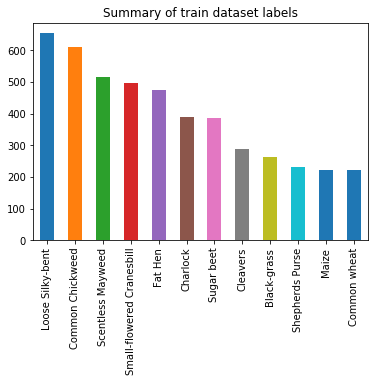

In [33]:
train['category'].value_counts().plot(kind='bar', title='Summary of train dataset labels')
#train['category'].value_counts(normalize=True).plot(kind='bar', title='Summary of train dataset labels')

In [61]:
x_train = train
y_train = train.loc[:, 'category_id'].values

In [62]:
# split data in to training and validation set
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)
print((X_train.shape, X_val.shape, Y_train.shape, Y_val.shape))

((3182, 4), (1568, 4), (3182,), (1568,))


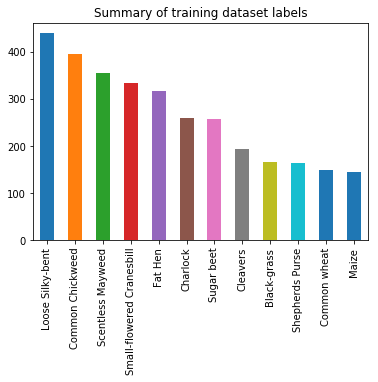

In [63]:
X_train['category'].value_counts().plot(kind='bar', title='Summary of training dataset labels')


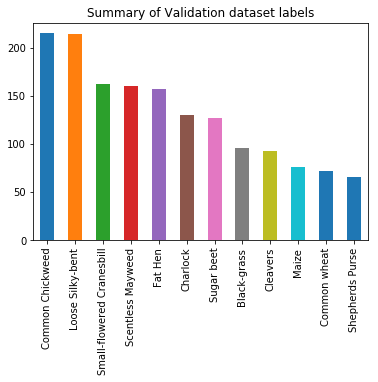

In [64]:
X_val['category'].value_counts().plot(kind='bar', title='Summary of Validation dataset labels')


In [35]:
test = []
for file in os.listdir(data_test):
    test.append(['test/{}'.format(file), file])
test = pd.DataFrame(test, columns=['filepath', 'file'])
print('')
print("test.shape =", test.shape )
test.head(2)


test.shape = (794, 2)


filepath           file
0  test/0021e90e4.png  0021e90e4.png
1  test/003d61042.png  003d61042.png

In [36]:
train.index.values

array([   0,    1,    2, ..., 4747, 4748, 4749], dtype=int64)

### Data Exploratory Visualization

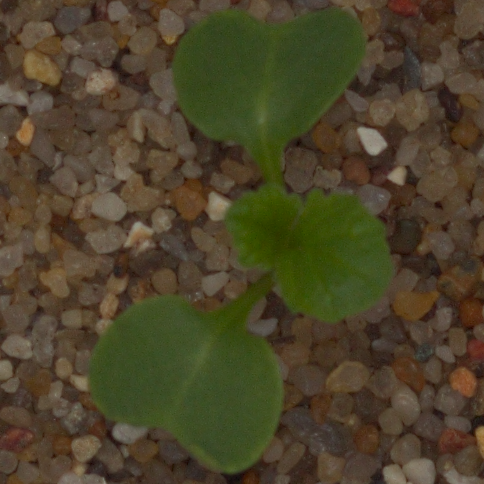

In [90]:
from IPython.display import Image
display(Image('input/train/Charlock/0a7e1ca41.png'))

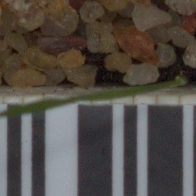

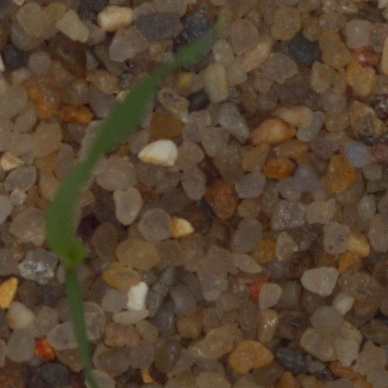

In [92]:
display(Image('input/train/Black-grass/0050f38b3.png'))
display(Image('input/train/Black-grass/0183fdf68.png'))


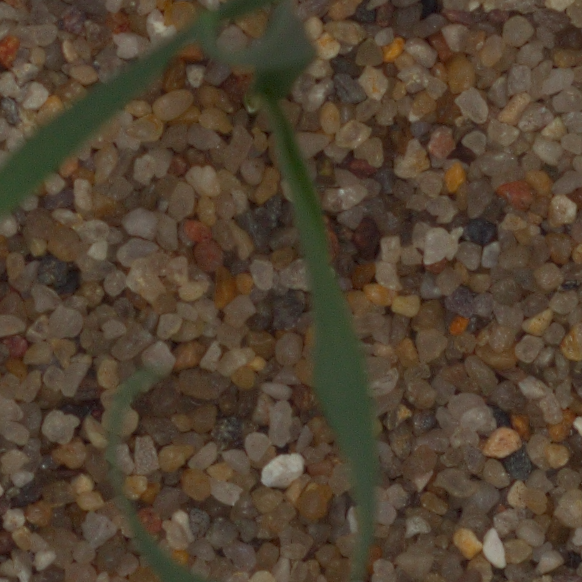

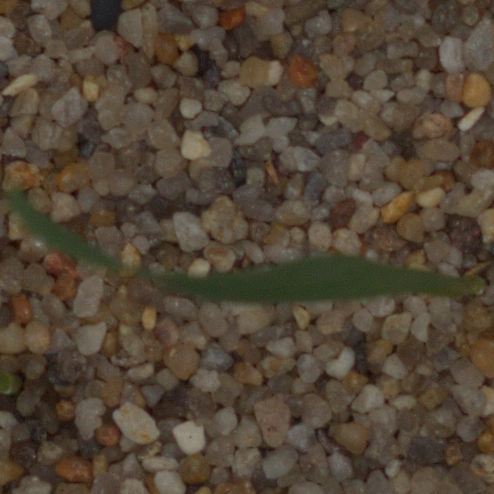

In [94]:
display(Image('input/train/Common wheat/3a40ee68b.png'))
display(Image('input/train/Common wheat/73eaf7247.png'))


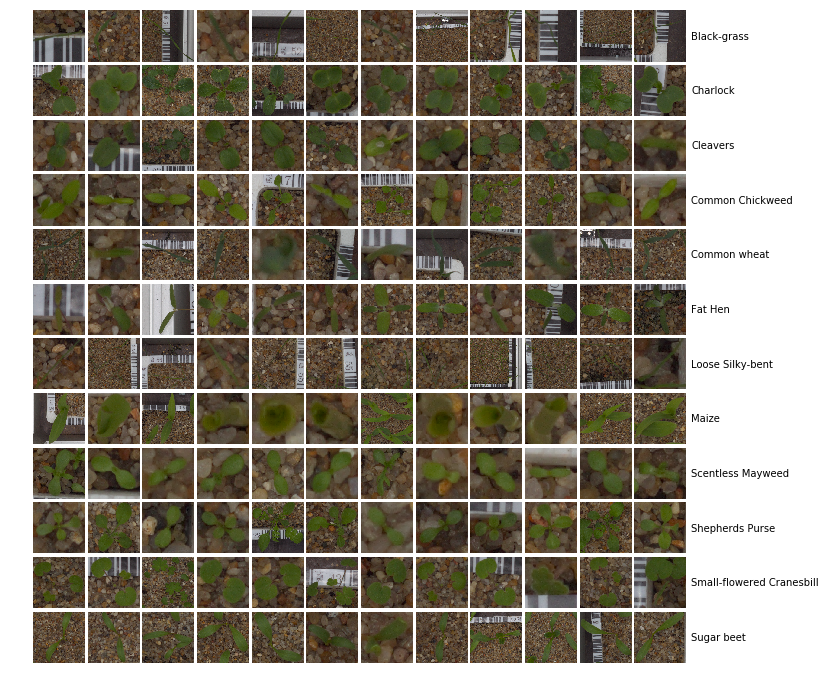

In [91]:
from mpl_toolkits.axes_grid1 import ImageGrid

## show 12 images of all species of train data

fig = plt.figure(1, figsize=(num_species, num_species))
grid = ImageGrid(fig, 111, nrows_ncols=(num_species, num_species), axes_pad=0.05)
i = 0
for category_id, category in enumerate(species):
    for filepath in train[train['category'] == category]['file'].values[:num_species]:
        ax = grid[i]
        img = read_img(filepath, (224, 224))
        ax.imshow(img / 255.)
        ax.axis('off')
        if i % num_species == num_species - 1:
            ax.text(250, 112, filepath.split('/')[1], verticalalignment='center')
        i += 1
plt.show();

This is our First Method, Here we will Extract VGG16 bottleneck features, by forward passing the processed image data, and then using this forward pass data as input to logistic regression for classification.

We don't need any form of preprocessing on our image data, that has been handled by preprocess_input function of VGG.


In [ ]:
INPUT_SIZE = 244
POOLING = 'avg'
x_train = np.zeros((len(train), INPUT_SIZE, INPUT_SIZE, 3), dtype='float32')
y_train= np.zeros((len(train),), dtype='float32')
for i, file in tqdm(enumerate(train['file'])):
    img = read_img(file, (INPUT_SIZE, INPUT_SIZE))
    x = preprocess_input(np.expand_dims(img.copy(), axis=0))
    x_train[i] = x
    y_train[i]=int(train['category_id'][i])
print('Train Images shape: {} size: {:,}'.format(x_train.shape, x_train.size))
print('Train Images shape: {} size: {:,}'.format(y_train.shape, y_train.size))


In [ ]:
Num_Class=num_species   # number of classes in dataset
# convert labels to one hot encoding
y_train=OneHotEncoded(y_train)
# split data in to training and validation set
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)
print((x_train.shape, y_train.shape))
print((X_train.shape, X_val.shape, Y_train.shape, Y_val.shape))

In [15]:
vgg_bottleneck = VGG16(weights='imagenet', include_top=False, pooling=POOLING)
train_vgg_bf = vgg_bottleneck.predict(X_train, batch_size=32, verbose=1)
valid_vgg_bf = vgg_bottleneck.predict(X_val, batch_size=32, verbose=1)
print('VGG train bottleneck features shape: {} size: {:,}'.format(train_vgg_bf.shape, train_vgg_bf.size))
print('VGG valid bottleneck features shape: {} size: {:,}'.format(valid_vgg_bf.shape, valid_vgg_bf.size))
print('')
print('save bottleneck features and labels for later ')
np.save(os.path.join(data_save_model,'train_vgg_bf.npy'), train_vgg_bf)
np.save(os.path.join(data_save_model,'valid_vgg_bf.npy'), valid_vgg_bf)



1568/1568 [==============================] - ETA: 9: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 48s - ETA: 36 - ETA: 24 - ETA: 12 - 604s 385ms/step
VGG train bottleneck features shape: (3182, 512) size: 1,629,184
VGG valid bottleneck features shape: (1568, 512) size: 802,816

save bottleneck features and labels for later 


In [18]:
# load bottleneck features and labels
train_vgg_bf = np.load(os.path.join(data_save_model,'train_vgg_bf.npy'))
valid_vgg_bf = np.load(os.path.join(data_save_model,'valid_vgg_bf.npy'))

print('VGG train bottleneck features shape: {} size: {:,}'.format(train_vgg_bf.shape, train_vgg_bf.size)) 
print('VGG valid bottleneck features shape: {} size: {:,}'.format(valid_vgg_bf.shape, valid_vgg_bf.size))



VGG train bottleneck features shape: (3182, 512) size: 1,629,184
VGG valid bottleneck features shape: (1568, 512) size: 802,816


In [22]:
Y_train_val=[]
Y_vali_val=[]
Y_train_val = (Y_train * range(Num_Class)).sum(axis=1)
Y_vali_val = (Y_val * range(Num_Class)).sum(axis=1)


In [23]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=147)
# logreg.fit(train_vgg_bf, (y_train * range(Num_Class)).sum(axis=1))
logreg.fit(train_vgg_bf, Y_train_val)
valid_probs = logreg.predict_proba(valid_vgg_bf)
valid_preds = logreg.predict(valid_vgg_bf)
compare_loss['Vgg16']=log_loss(Y_val, valid_probs)
# compare_accuracy['Vgg16']=accuracy_score((y_val * range(Num_Class)).sum(axis=1), valid_preds)
compare_accuracy['Vgg16']=accuracy_score(Y_vali_val, valid_preds)
print('Validation VGG LogLoss {}'.format(compare_loss['Vgg16']))
print('Validation VGG Accuracy {}'.format(compare_accuracy['Vgg16']))

Validation VGG LogLoss 0.807683561795666
Validation VGG Accuracy 0.7429846938775511


In [25]:
acc_train_vgg_logreg = logreg.score(train_vgg_bf, Y_train_val)
acc_test_vgg_logreg = logreg.score(valid_vgg_bf, Y_vali_val)

print('Logistic Regression + Vgg16')
print('Accuracy train = %.4f and valid = %.4f'%(acc_train_vgg_logreg, acc_test_vgg_logreg))



Logistic Regression + Vgg16
Accuracy train = 0.7772 and valid = 0.7430


In [26]:
print('Validation Xception F1-Score is %.3g'%(f1_score(Y_vali_val, valid_preds, average='macro')*100))
print('Validation Xception F1-Score is %.3g'%(f1_score(Y_vali_val, valid_preds, average='micro')*100))
print('Validation Xception F1-Score is %.3g'%(f1_score(Y_vali_val, valid_preds, average='weighted')*100))


Validation Xception F1-Score is 71.5
Validation Xception F1-Score is 74.3
Validation Xception F1-Score is 73.8


we just use last layer as logistic regression, basically one layered neural network(cross entropy). The accuracy we obtained is around 74.3%

### Data Transformation

Here we are applying data transformation and data augmentation was used. Data transformation alters our training data by applying image mask, image segment, & image sharpen etc. At the same data augmentation alters our training batches by applying random rotations, cropping, flipping, shifting, shearing etc.

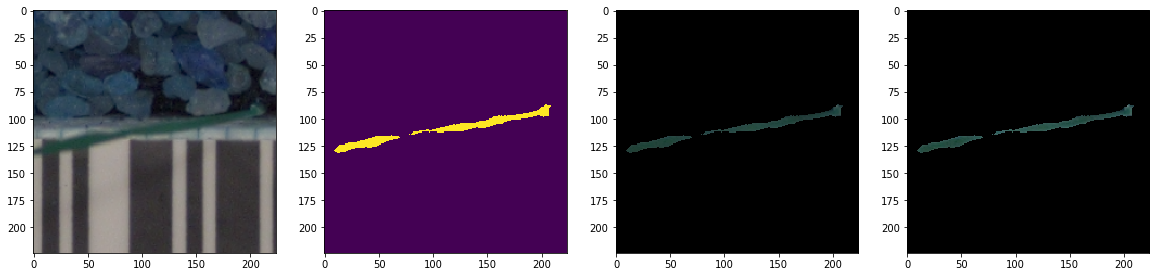

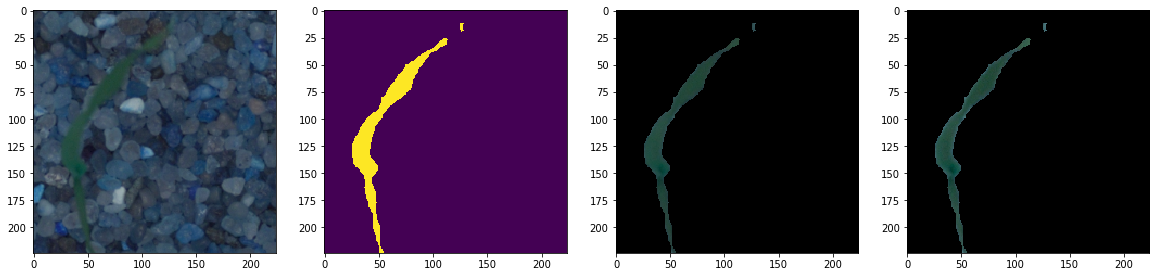

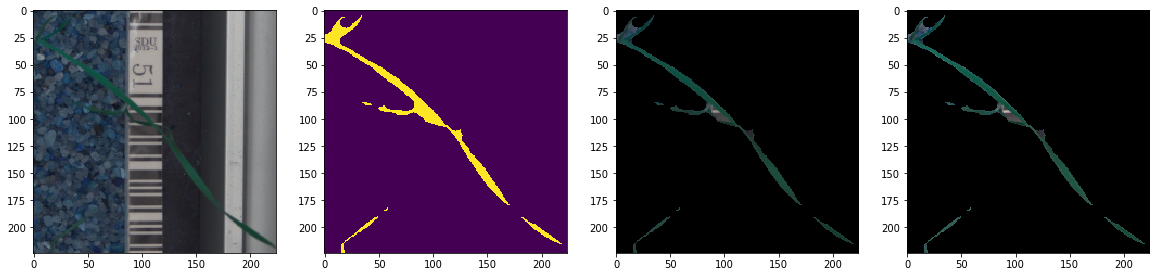

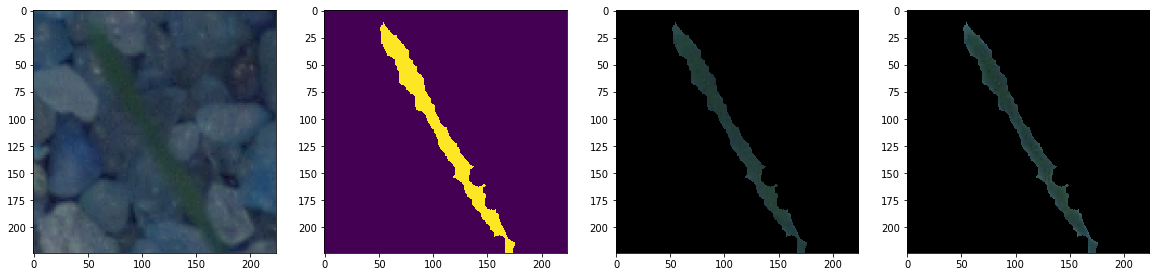

In [37]:
## detect and segment plants in the image 

def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

def read_segmented_image(filepath, img_size):
    img = cv2.imread(os.path.join(data_dir, filepath), cv2.IMREAD_COLOR)
    img = cv2.resize(img.copy(), img_size, interpolation = cv2.INTER_AREA)

    image_mask = create_mask_for_plant(img)
    image_segmented = segment_plant(img)
    image_sharpen = sharpen_image(image_segmented)
    return img, image_mask, image_segmented, image_sharpen
     

# show some images
# show plots
show_plots = True # set False to reduce notebook running time
if show_plots:
    for i in range(4):
 
        img, image_mask, image_segmented, image_sharpen = read_segmented_image(
            train.loc[i,'file'],(224,224))
        
        fig, axs = plt.subplots(1, 4, figsize=(20, 20))
        axs[0].imshow(img.astype(np.uint8))
        axs[1].imshow(image_mask.astype(np.uint8))
        axs[2].imshow(image_segmented.astype(np.uint8))
        axs[3].imshow(image_sharpen.astype(np.uint8))


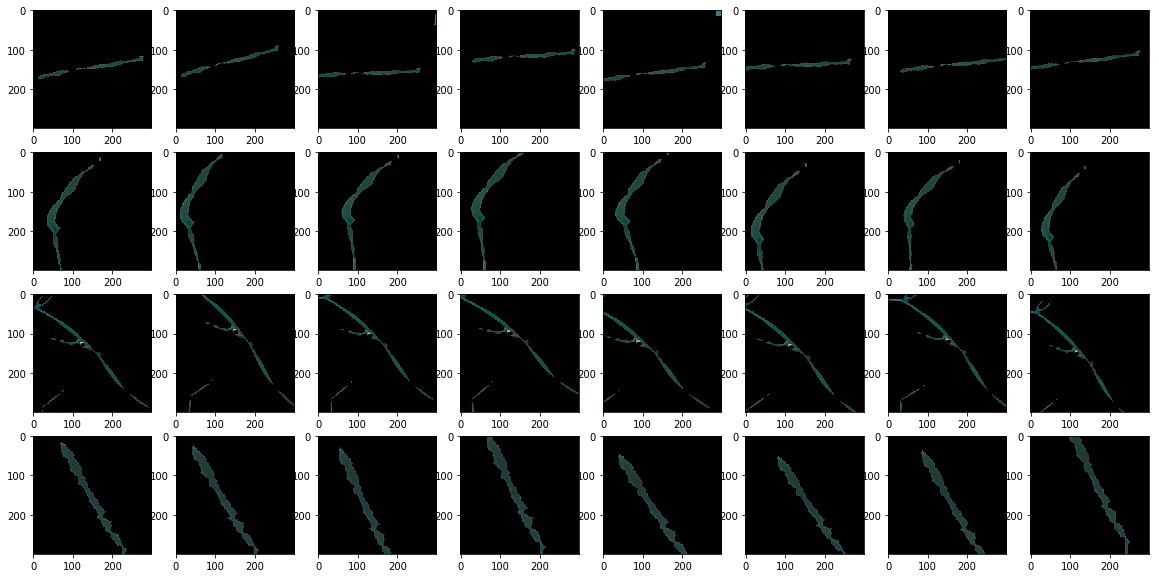

In [176]:
# data augmentation

# generate new images via rotations, translations, flippings
def generate_images(imgs):
    imgs_len = len(imgs)
    image_generator = ImageDataGenerator(
        rotation_range = 10, width_shift_range = 0.1 , height_shift_range = 0.1,
        horizontal_flip = False, vertical_flip = False, zoom_range = 0.1)

    imgs = image_generator.flow(imgs.copy(), 
                                np.zeros(imgs_len), 
                                batch_size=imgs_len, 
                                shuffle = False).next()    
  
    # return transformed images in the same order as the original ones
    return imgs[0]


# show some examples
if show_plots:
    imgs = (((x_train_valid[0:4]+1.)/2.)*255.) # transform pixels into range [0,255]
    imgs_generated = imgs

    fig, axs = plt.subplots(4, 8, figsize=(20, 10))
    for i in range(8):
        axs[0,i].imshow(imgs_generated[0].astype(np.uint8))
        axs[1,i].imshow(imgs_generated[1].astype(np.uint8))
        axs[2,i].imshow(imgs_generated[2].astype(np.uint8))
        axs[3,i].imshow(imgs_generated[3].astype(np.uint8))   
        imgs_generated = generate_images(imgs)


In [38]:
## read and preprocess all training/validation/test images and labels

def preprocess_image(img):
    img /= 255.
    img -= 0.5
    img *= 2
    return img

target_image_size = 299

print('read and preprocess training and validation images')

# read, preprocess training and validation images  
x_train_valid = np.zeros((len(train), target_image_size, target_image_size, 3),
                         dtype='float32')
y_train_valid = train.loc[:, 'category_id'].values 
for i, filepath in tqdm(enumerate(train['file'])):
    
    # read original images
    #img = read_image(filepath, (target_image_size, target_image_size))
    
    # read segmented image
    _,_,_,img = read_segmented_image(filepath, (target_image_size, target_image_size))
    
    # all pixel values are now between -1 and 1
    x_train_valid[i] = preprocess_image(np.expand_dims(img.copy().astype(np.float), axis=0)) 

print('read and preprocess test images')

# read, preprocess test images  
x_test = np.zeros((len(test), target_image_size, target_image_size, 3), dtype='float32')
for i, filepath in tqdm(enumerate(test['filepath'])):
    
    # read original image
    #img = read_image(filepath, (target_image_size, target_image_size))
    
    # read segmented image
    _,_,_,img = read_segmented_image(filepath, (target_image_size, target_image_size))
    
    # all pixel values are now between -1 and 1
    x_test[i] = preprocess_image(np.expand_dims(img.copy().astype(np.float), axis=0)) 
    
print('x_train_valid.shape = ', x_train_valid.shape)
print('y_train_valid.shape = ', y_train_valid.shape)
print('x_test.shape = ', x_test.shape)

read and preprocess training and validation images



0it [00:00, ?it/s]
6it [00:00, 42.22it/s]
8it [00:00, 27.71it/s]
11it [00:00, 24.77it/s]
13it [00:00, 22.79it/s]
16it [00:00, 23.46it/s]
20it [00:00, 26.31it/s]
23it [00:01, 16.17it/s]
29it [00:01, 19.11it/s]
34it [00:01, 23.09it/s]
38it [00:01, 25.58it/s]
42it [00:01, 27.21it/s]
48it [00:01, 32.23it/s]
52it [00:01, 32.87it/s]
57it [00:01, 34.86it/s]
61it [00:02, 35.86it/s]
66it [00:02, 39.18it/s]
71it [00:02, 41.58it/s]
76it [00:02, 42.55it/s]
81it [00:02, 40.63it/s]
86it [00:02, 30.96it/s]
91it [00:02, 33.74it/s]
95it [00:03, 24.66it/s]
99it [00:03, 16.82it/s]
105it [00:03, 21.24it/s]
110it [00:03, 24.00it/s]
115it [00:03, 28.34it/s]
119it [00:04, 30.41it/s]
123it [00:04, 31.52it/s]
127it [00:04, 19.98it/s]
132it [00:04, 23.24it/s]
139it [00:04, 29.07it/s]
145it [00:04, 34.09it/s]
150it [00:05, 35.06it/s]
155it [00:05, 34.52it/s]
160it [00:05, 35.53it/s]
165it [00:05, 29.79it/s]
169it [00:05, 29.67it/s]
173it [00:05, 28.09it/s]
177it [00:05, 28.90it/s]
181it [00:06, 22.40it/s]
184it

2052it [00:40, 53.46it/s]
2058it [00:41, 54.21it/s]
2065it [00:41, 57.84it/s]
2072it [00:41, 56.03it/s]
2079it [00:41, 57.53it/s]
2085it [00:41, 56.75it/s]
2093it [00:41, 60.33it/s]
2100it [00:41, 56.25it/s]
2106it [00:41, 56.98it/s]
2113it [00:41, 58.82it/s]
2121it [00:42, 63.73it/s]
2128it [00:42, 61.67it/s]
2135it [00:42, 55.17it/s]
2142it [00:42, 58.90it/s]
2149it [00:42, 61.18it/s]
2156it [00:42, 60.44it/s]
2163it [00:42, 59.17it/s]
2170it [00:42, 59.97it/s]
2177it [00:43, 59.00it/s]
2183it [00:43, 51.63it/s]
2189it [00:43, 52.74it/s]
2195it [00:43, 53.26it/s]
2201it [00:43, 52.92it/s]
2207it [00:43, 52.13it/s]
2213it [00:43, 50.30it/s]
2219it [00:43, 44.70it/s]
2224it [00:44, 45.16it/s]
2229it [00:44, 37.67it/s]
2234it [00:44, 38.15it/s]
2241it [00:44, 43.76it/s]
2248it [00:44, 49.30it/s]
2254it [00:44, 41.74it/s]
2259it [00:45, 30.43it/s]
2263it [00:45, 29.84it/s]
2267it [00:45, 32.14it/s]
2271it [00:45, 32.33it/s]
2276it [00:45, 34.80it/s]
2280it [00:45, 33.64it/s]
2285it [00:4

4096it [01:22, 59.31it/s]
4102it [01:22, 58.46it/s]
4108it [01:22, 58.73it/s]
4114it [01:22, 56.26it/s]
4120it [01:22, 50.26it/s]
4126it [01:22, 52.00it/s]
4132it [01:22, 50.08it/s]
4138it [01:22, 49.71it/s]
4144it [01:23, 51.82it/s]
4151it [01:23, 55.12it/s]
4158it [01:23, 58.42it/s]
4164it [01:23, 58.70it/s]
4170it [01:23, 54.86it/s]
4177it [01:23, 57.08it/s]
4183it [01:23, 55.04it/s]
4189it [01:23, 52.57it/s]
4195it [01:23, 54.41it/s]
4201it [01:24, 55.68it/s]
4207it [01:24, 48.60it/s]
4213it [01:24, 50.11it/s]
4219it [01:24, 50.19it/s]
4226it [01:24, 54.07it/s]
4232it [01:24, 52.08it/s]
4238it [01:24, 52.93it/s]
4244it [01:24, 50.94it/s]
4250it [01:25, 42.74it/s]
4257it [01:25, 47.60it/s]
4264it [01:25, 50.92it/s]
4270it [01:25, 49.02it/s]
4277it [01:25, 53.48it/s]
4283it [01:25, 52.79it/s]
4289it [01:25, 53.72it/s]
4295it [01:25, 54.25it/s]
4301it [01:25, 51.93it/s]
4309it [01:26, 57.78it/s]
4316it [01:26, 53.42it/s]
4322it [01:26, 53.03it/s]
4328it [01:26, 52.07it/s]
4335it [01:2

read and preprocess test images



0it [00:00, ?it/s]
2it [00:00, 16.94it/s]
5it [00:00, 19.03it/s]
10it [00:00, 23.05it/s]
14it [00:00, 25.64it/s]
17it [00:00, 26.66it/s]
20it [00:00, 24.53it/s]
23it [00:00, 22.81it/s]
28it [00:00, 26.56it/s]
31it [00:01, 26.91it/s]
34it [00:01, 27.01it/s]
37it [00:01, 27.16it/s]
40it [00:01, 17.24it/s]
43it [00:01, 18.89it/s]
46it [00:01, 19.07it/s]
49it [00:02, 19.45it/s]
53it [00:02, 20.87it/s]
56it [00:02, 21.43it/s]
60it [00:02, 22.69it/s]
63it [00:02, 24.48it/s]
66it [00:02, 25.70it/s]
71it [00:02, 29.55it/s]
75it [00:02, 27.78it/s]
79it [00:03, 27.60it/s]
82it [00:03, 26.76it/s]
86it [00:03, 28.93it/s]
90it [00:03, 30.05it/s]
94it [00:03, 25.75it/s]
98it [00:03, 28.40it/s]
102it [00:04, 23.73it/s]
105it [00:04, 21.46it/s]
108it [00:04, 23.35it/s]
112it [00:04, 21.00it/s]
115it [00:04, 17.05it/s]
118it [00:04, 18.67it/s]
121it [00:05, 18.87it/s]
124it [00:05, 19.96it/s]
128it [00:05, 22.61it/s]
132it [00:05, 25.50it/s]
136it [00:05, 25.29it/s]
140it [00:05, 25.29it/s]
143it [00:

x_train_valid.shape =  (4750, 299, 299, 3)
y_train_valid.shape =  (4750,)
x_test.shape =  (794, 299, 299, 3)


In [39]:
Num_Class=num_species   # number of classes in dataset
# convert labels to one hot encoding
#y_train=OneHotEncoded(y_train)
# split data in to training and validation set
X_train, X_val, Y_train, Y_val = train_test_split(x_train_valid, y_train_valid, test_size=0.33, random_state=42)
print((X_train.shape, X_val.shape, Y_train.shape, Y_val.shape))

((3182, 299, 299, 3), (1568, 299, 299, 3), (3182,), (1568,))


### Model Implementation with image augmentation and transformation data

In [40]:
# load bottleneck features and labels

train_vgg_bf_aug = np.load(os.path.join(data_save_model,'train_vgg_bf_aug.npy'))
valid_vgg_bf_aug = np.load(os.path.join(data_save_model,'valid_vgg_bf_aug.npy'))

train_x_bf_aug = np.load(os.path.join(data_save_model,'train_x_bf_aug.npy'))
valid_x_bf_aug = np.load(os.path.join(data_save_model,'valid_x_bf_aug.npy'))

train_i_bf_aug = np.load(os.path.join(data_save_model,'train_i_bf_aug.npy'))
valid_i_bf_aug = np.load(os.path.join(data_save_model,'valid_i_bf_aug.npy'))

print('VGG train bottleneck features shape: {} size: {:,}'.format(train_vgg_bf_aug.shape, train_vgg_bf_aug.size)) 
print('VGG valid bottleneck features shape: {} size: {:,}'.format(valid_vgg_bf_aug.shape, valid_vgg_bf_aug.size))

print('Xception  train bottleneck features shape: {} size: {:,}'.format(train_x_bf_aug.shape, train_x_bf_aug.size)) 
print('Xception  valid bottleneck features shape: {} size: {:,}'.format(valid_x_bf_aug.shape, valid_x_bf_aug.size))

print('InceptionV3  train bottleneck features shape: {} size: {:,}'.format(train_x_bf_aug.shape, train_x_bf_aug.size)) 
print('InceptionV3  valid bottleneck features shape: {} size: {:,}'.format(valid_x_bf_aug.shape, valid_x_bf_aug.size))




VGG train bottleneck features shape: (3182, 512) size: 1,629,184
VGG valid bottleneck features shape: (1568, 512) size: 802,816
Xception  train bottleneck features shape: (3182, 2048) size: 6,516,736
Xception  valid bottleneck features shape: (1568, 2048) size: 3,211,264
InceptionV3  train bottleneck features shape: (3182, 2048) size: 6,516,736
InceptionV3  valid bottleneck features shape: (1568, 2048) size: 3,211,264


In [180]:
vgg_bottleneck = VGG16(weights='imagenet', include_top=False, pooling=POOLING)
train_vgg_bf_aug = vgg_bottleneck.predict(X_train, batch_size=32, verbose=1)
valid_vgg_bf_aug = vgg_bottleneck.predict(X_val, batch_size=32, verbose=1)
print('VGG train bottleneck features shape: {} size: {:,}'.format(train_vgg_bf_aug.shape, train_vgg_bf_aug.size))
print('VGG valid bottleneck features shape: {} size: {:,}'.format(valid_vgg_bf_aug.shape, valid_vgg_bf_aug.size))
print('')
print('save bottleneck features and labels for later ')
np.save(os.path.join(data_save_model,'train_vgg_bf_aug.npy'), train_vgg_bf_aug)
np.save(os.path.join(data_save_model,'valid_vgg_bf_aug.npy'), valid_vgg_bf_aug)



1568/1568 [==============================] - ETA: 14:2 - ETA: 14:2 - ETA: 13:5 - ETA: 14:1 - ETA: 14:0 - ETA: 13:5 - ETA: 13:2 - ETA: 13:0 - ETA: 12:3 - ETA: 12:1 - ETA: 11:4 - ETA: 11:2 - ETA: 11:0 - ETA: 10:4 - ETA: 10:3 - ETA: 10:1 - ETA: 9:5 - ETA: 9: - ETA: 9: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 55s - ETA: 36 - ETA: 18 - 901s 575ms/step
VGG train bottleneck features shape: (3182, 512) size: 1,629,184
VGG valid bottleneck features shape: (1568, 512) size: 802,816

save bottleneck features and labels for later 


In [181]:
# forward passing the training and validation set
xception_bottleneck = xception.Xception(weights='imagenet', include_top=False, pooling=POOLING)
train_x_bf_aug = xception_bottleneck.predict(X_train, batch_size=32, verbose=1)
valid_x_bf_aug = xception_bottleneck.predict(X_val, batch_size=32, verbose=1)
print('Xception train bottleneck features shape: {} size: {:,}'.format(train_x_bf_aug.shape, train_x_bf_aug.size))
print('Xception valid bottleneck features shape: {} size: {:,}'.format(valid_x_bf_aug.shape, valid_x_bf_aug.size))
print('')
print('save Xception train bottleneck features and labels for later ')
np.save(os.path.join(data_save_model,'train_x_bf_aug.npy'), train_x_bf_aug)
np.save(os.path.join(data_save_model,'valid_x_bf_aug.npy'), valid_x_bf_aug)

1568/1568 [==============================] - ETA: 31:5 - ETA: 30:3 - ETA: 29:5 - ETA: 29:2 - ETA: 28:4 - ETA: 28:0 - ETA: 27:2 - ETA: 26:3 - ETA: 25:5 - ETA: 25:1 - ETA: 24:3 - ETA: 23:5 - ETA: 23:1 - ETA: 22:3 - ETA: 21:5 - ETA: 21:3 - ETA: 21:3 - ETA: 21:1 - ETA: 20:5 - ETA: 20:3 - ETA: 20:0 - ETA: 19:4 - ETA: 19:1 - ETA: 18:5 - ETA: 18:1 - ETA: 17:3 - ETA: 16:5 - ETA: 16:1 - ETA: 15:3 - ETA: 15:0 - ETA: 14:1 - ETA: 13:3 - ETA: 12:4 - ETA: 12:0 - ETA: 11:1 - ETA: 10:2 - ETA: 9:3 - ETA: 8: - ETA: 7: - ETA: 7: - ETA: 6: - ETA: 5: - ETA: 4: - ETA: 3: - ETA: 3: - ETA: 2: - ETA: 1: - ETA: 45s - 2239s 1s/step
Xception train bottleneck features shape: (3182, 2048) size: 6,516,736
Xception valid bottleneck features shape: (1568, 2048) size: 3,211,264

save Xception train bottleneck features and labels for later 


In [41]:
compare_loss={}
compare_accuracy={}

logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=147)
# logreg.fit(train_vgg_bf, (y_train * range(Num_Class)).sum(axis=1))
logreg.fit(train_vgg_bf_aug, Y_train)
valid_probs = logreg.predict_proba(valid_vgg_bf_aug)
valid_preds = logreg.predict(valid_vgg_bf_aug)
compare_loss['Vgg16_logreg']=log_loss(Y_val, valid_probs)
# compare_accuracy['Vgg16']=accuracy_score((y_val * range(Num_Class)).sum(axis=1), valid_preds)
compare_accuracy['Vgg16_logreg']=accuracy_score(Y_val, valid_preds)
print('Validation VGG LogLoss {}'.format(compare_loss['Vgg16_logreg']))
print('Validation VGG Accuracy {}'.format(compare_accuracy['Vgg16_logreg']))

acc_train_vgg_logreg = logreg.score(train_vgg_bf_aug, Y_train)
acc_test_vgg_logreg = logreg.score(valid_vgg_bf_aug, Y_val)

print('Logistic Regression + Vgg16')
print('Accuracy train = %.4f and valid = %.4f'%(acc_train_vgg_logreg, acc_test_vgg_logreg))

print('Validation VGG logreg F1-Score is %.3g'%(f1_score(Y_val, valid_preds, average='micro')*100))

Validation VGG LogLoss 0.43874134927796543
Validation VGG Accuracy 0.8660714285714286
Logistic Regression + Vgg16
Accuracy train = 0.8894 and valid = 0.8661
Validation VGG logreg F1-Score is 86.6


In [65]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=147)
logreg.fit(train_x_bf_aug, Y_train)
valid_probs = logreg.predict_proba(valid_x_bf_aug)
valid_preds = logreg.predict(valid_x_bf_aug)
compare_loss['Xception_logreg']=log_loss(Y_val, valid_probs)
compare_accuracy['Xception_logreg']=accuracy_score(Y_val, valid_preds)
print('Validation Xception LogLoss {}'.format(compare_loss['Xception_logreg']))
print('Validation Xception Accuracy {}'.format(compare_accuracy['Xception_logreg']))

acc_train_x_logreg = logreg.score(train_x_bf_aug, Y_train)
acc_test_x_logreg = logreg.score(valid_x_bf_aug, Y_val)

print('Logistic Regression + Xception')
print('Accuracy train = %.4f and valid = %.4f'%(acc_train_x_logreg, acc_test_x_logreg))

print('Validation Xception logreg F1-Score is %.3g'%(f1_score(Y_val, valid_preds, average='micro')*100))

Validation Xception LogLoss 0.2811436890260791
Validation Xception Accuracy 0.9030612244897959
Logistic Regression + Xception
Accuracy train = 0.9978 and valid = 0.9031
Validation Xception logreg F1-Score is 90.3


In [43]:
## random forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=num_species)
random_forest.fit(train_x_bf_aug, Y_train)

valid_probs = logreg.predict_proba(valid_x_bf_aug)
valid_preds = logreg.predict(valid_x_bf_aug)

acc_train_random_forest = random_forest.score(train_x_bf_aug, Y_train)
acc_valid_random_forest = random_forest.score(valid_x_bf_aug, Y_val)

compare_loss['Xception_random_forest']=log_loss(Y_val, valid_probs)
compare_accuracy['Xception_random_forest']=accuracy_score(Y_val, valid_preds)
print('Validation Xception LogLoss {}'.format(compare_loss['Xception_random_forest']))
print('Validation Xception Accuracy {}'.format(compare_accuracy['Xception_random_forest']))

print('Random Forest')
print('Accuracy train/valid = %.4f/%.4f'%(acc_train_random_forest, acc_valid_random_forest))

print('Validation Xception randomforest F1-Score is %.3g'%(f1_score(Y_val, valid_preds, average='micro')*100))


Validation Xception LogLoss 0.2811436890260791
Validation Xception Accuracy 0.9030612244897959
Random Forest
Accuracy train/valid = 0.9972/0.7640
Validation Xception randomforest F1-Score is 90.3


In [ ]:

inception_bottleneck = inception_v3.InceptionV3(weights='imagenet', include_top=False, pooling=POOLING)
train_i_bf_aug = inception_bottleneck.predict(X_train, batch_size=32, verbose=1)
valid_i_bf_aug = inception_bottleneck.predict(X_val, batch_size=32, verbose=1)
print('InceptionV3 train bottleneck features shape: {} size: {:,}'.format(train_i_bf_aug.shape, train_i_bf_aug.size))
print('InceptionV3 valid bottleneck features shape: {} size: {:,}'.format(valid_i_bf_aug.shape, valid_i_bf_aug.size))

print('')
print('save InceptionV3 train bottleneck features and labels for later ')
np.save(os.path.join(data_save_model,'train_i_bf_aug.npy'), train_i_bf_aug)
np.save(os.path.join(data_save_model,'valid_i_bf_aug.npy'), valid_i_bf_aug)

2656/3182 [========================>.....] - ETA: 41:1 - ETA: 39:0 - ETA: 37:4 - ETA: 37:3 - ETA: 37:3 - ETA: 37:1 - ETA: 37:2 - ETA: 37:2 - ETA: 36:5 - ETA: 36:3 - ETA: 36:0 - ETA: 35:4 - ETA: 35:2 - ETA: 34:5 - ETA: 34:3 - ETA: 34:1 - ETA: 33:3 - ETA: 33:3 - ETA: 33:1 - ETA: 32:5 - ETA: 32:4 - ETA: 32:1 - ETA: 31:5 - ETA: 31:1 - ETA: 30:4 - ETA: 30:1 - ETA: 29:4 - ETA: 29:1 - ETA: 28:4 - ETA: 28:1 - ETA: 27:5 - ETA: 27:2 - ETA: 26:5 - ETA: 26:2 - ETA: 25:5 - ETA: 25:2 - ETA: 24:5 - ETA: 24:2 - ETA: 23:5 - ETA: 23:3 - ETA: 23:0 - ETA: 22:4 - ETA: 22:1 - ETA: 21:5 - ETA: 21:2 - ETA: 21:0 - ETA: 20:4 - ETA: 20:1 - ETA: 19:4 - ETA: 19:2 - ETA: 18:5 - ETA: 18:3 - ETA: 18:1 - ETA: 17:4 - ETA: 17:2 - ETA: 16:5 - ETA: 16:3 - ETA: 16:0 - ETA: 15:4 - ETA: 15:1 - ETA: 14:5 - ETA: 14:2 - ETA: 14:0 - ETA: 13:4 - ETA: 13:1 - ETA: 12:5 - ETA: 12:3 - ETA: 12:0 - ETA: 11:4 - ETA: 11:2 - ETA: 10:5 - ETA: 10:3 - ETA: 10:1 - ETA: 9:5 - ETA: 9: - ETA: 9: - ETA: 8: - ETA: 8: - ETA: 7: - ETA: 7: - ETA: 7: 

In [44]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=147)
logreg.fit(train_i_bf_aug, Y_train)
valid_probs = logreg.predict_proba(valid_i_bf_aug)
valid_preds = logreg.predict(valid_i_bf_aug)
compare_loss['InceptionV3_logreg']=log_loss(Y_val, valid_probs)
compare_accuracy['InceptionV3_logreg']=accuracy_score(Y_val, valid_preds)
print('Validation InceptionV3 LogLoss {}'.format(compare_loss['InceptionV3_logreg']))
print('Validation InceptionV3 Accuracy {}'.format(compare_accuracy['InceptionV3_logreg']))

acc_train_x_logreg = logreg.score(train_i_bf_aug, Y_train)
acc_test_x_logreg = logreg.score(valid_i_bf_aug, Y_val)

print('Logistic Regression + InceptionV3')
print('Accuracy train = %.4f and valid = %.4f'%(acc_train_x_logreg, acc_test_x_logreg))

print('Validation InceptionV3 logreg F1-Score is %.3g'%(f1_score(Y_val, valid_preds, average='micro')*100))

Validation InceptionV3 LogLoss 0.4484643352609531
Validation InceptionV3 Accuracy 0.8724489795918368
Logistic Regression + InceptionV3
Accuracy train = 0.9991 and valid = 0.8724
Validation InceptionV3 logreg F1-Score is 87.2


In [45]:
## random forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=num_species)
random_forest.fit(train_i_bf_aug, Y_train)

valid_probs = logreg.predict_proba(valid_i_bf_aug)
valid_preds = logreg.predict(valid_i_bf_aug)

acc_train_random_forest = random_forest.score(train_i_bf_aug, Y_train)
acc_valid_random_forest = random_forest.score(valid_i_bf_aug, Y_val)

compare_loss['InceptionV3_random_forest']=log_loss(Y_val, valid_probs)
compare_accuracy['InceptionV3_random_forest']=accuracy_score(Y_val, valid_preds)
print('Validation InceptionV3 LogLoss {}'.format(compare_loss['InceptionV3_random_forest']))
print('Validation InceptionV3 Accuracy {}'.format(compare_accuracy['InceptionV3_random_forest']))

print('Random Forest')
print('Accuracy train/valid = %.4f/%.4f'%(acc_train_random_forest, acc_valid_random_forest))

print('Validation InceptionV3 randomforest F1-Score is %.3g'%(f1_score(Y_val, valid_preds, average='micro')*100))


Validation InceptionV3 LogLoss 0.4484643352609531
Validation InceptionV3 Accuracy 0.8724489795918368
Random Forest
Accuracy train/valid = 0.9975/0.7270
Validation InceptionV3 randomforest F1-Score is 87.2


In [48]:
X = np.hstack([train_x_bf_aug, train_i_bf_aug])
V = np.hstack([valid_x_bf_aug, valid_i_bf_aug])

print('')
print('save Xception + InceptionV3 train bottleneck features and labels for later ')
np.save(os.path.join(data_save_model,'train_x_i_bf.npy'), X)
np.save(os.path.join(data_save_model,'valid_x_i_bf.npy'), V)

print('Full train bottleneck features shape: {} size: {:,}'.format(X.shape, X.size))
print('Full valid bottleneck features shape: {} size: {:,}'.format(V.shape, V.size))


save Xception + InceptionV3 train bottleneck features and labels for later 
Full train bottleneck features shape: (3182, 4096) size: 13,033,472
Full valid bottleneck features shape: (1568, 4096) size: 6,422,528


In [49]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=1987)
logreg.fit(X, Y_train)
valid_probs = logreg.predict_proba(V)
valid_preds = logreg.predict(V)

acc_train_random_forest = random_forest.score(X, Y_train)
acc_valid_random_forest = random_forest.score(V, Y_val)

compare_loss['Xception_Inception']=log_loss(Y_val, valid_probs)
compare_accuracy['Xception_Inception']=accuracy_score(Y_val, valid_preds)
print('Validation Xception + Inception LogLoss {}'.format(compare_loss['Xception_Inception']))
print('Validation Xception + Inception Accuracy {}'.format(compare_accuracy['Xception_Inception']))



Validation Xception + Inception LogLoss 0.33105541429171415
Validation Xception + Inception Accuracy 0.9036989795918368


In [85]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=1987)
logreg.fit(X, Y_train)
valid_probs = logreg.predict_proba(V)
valid_preds = logreg.predict(V)

acc_train_random_forest = logreg.score(X, Y_train)
acc_valid_random_forest = logreg.score(V, Y_val)

compare_loss['Xception_Inception']=log_loss(Y_val, valid_probs)
compare_accuracy['Xception_Inception']=accuracy_score(Y_val, valid_preds)
print('Validation Xception + Inception LogLoss {}'.format(compare_loss['Xception_Inception']))
print('Validation Xception + Inception Accuracy {}'.format(compare_accuracy['Xception_Inception']))

print('Random Forest')
print('Accuracy train/valid = %.4f/%.4f'%(acc_train_random_forest, acc_valid_random_forest))


Validation Xception + Inception LogLoss 0.33105541429171415
Validation Xception + Inception Accuracy 0.9036989795918368
Random Forest
Accuracy train/valid = 0.9991/0.9037


In [ ]:
print('Random Forest')
print('Accuracy train/valid = %.4f/%.4f'%(acc_train_random_forest, acc_valid_random_forest))



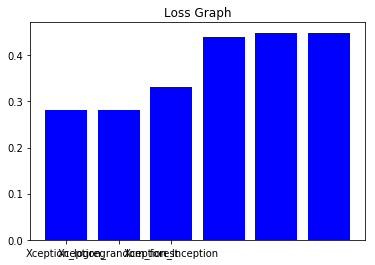

In [50]:

plt.bar(list(compare_loss.keys()), compare_loss.values(), color='b')
plt.xticks(range(0,3),list(compare_loss.keys()))
plt.title('Loss Graph')
plt.show()

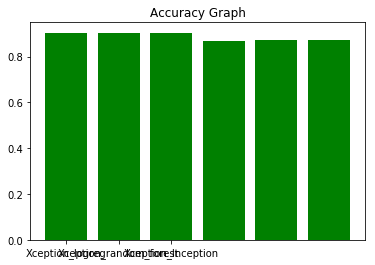

In [51]:
plt.bar(list(compare_accuracy.keys()), compare_accuracy.values(), color='g')
plt.xticks(range(0,3),list(compare_accuracy.keys()))
plt.title('Accuracy Graph')
plt.show()

In [54]:
compare_loss

{'InceptionV3_logreg': 0.4484643352609531,
 'InceptionV3_random_forest': 0.4484643352609531,
 'Vgg16_logreg': 0.43874134927796543,
 'Xception_Inception': 0.33105541429171415,
 'Xception_logreg': 0.2811436890260791,
 'Xception_random_forest': 0.2811436890260791}

In [56]:
compare_accuracy

{'InceptionV3_logreg': 0.8724489795918368,
 'InceptionV3_random_forest': 0.8724489795918368,
 'Vgg16_logreg': 0.8660714285714286,
 'Xception_Inception': 0.9036989795918368,
 'Xception_logreg': 0.9030612244897959,
 'Xception_random_forest': 0.9030612244897959}

### F1- Score  ( VGG16 )

For getting more information on f1_score [click here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

Here we will test with Xception bottleneck features, and use these features to train logistic regression.

In [27]:
INPUT_SIZE = 299
POOLING = 'avg'
x_train = np.zeros((len(train), INPUT_SIZE, INPUT_SIZE, 3), dtype='float32')
y_train= np.zeros((len(train),), dtype='float32')

for i, img_id in tqdm(enumerate(train['file'])):
    img = read_img(img_id, (INPUT_SIZE, INPUT_SIZE))
    x = xception.preprocess_input(np.expand_dims(img.copy(), axis=0)) # preprocessing data for Xception model
    x_train[i] = x
    y_train[i]=int(train['category_id'][i])
    
y_train=OneHotEncoded(y_train)

X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.33, random_state=42)

print((X_train.shape, X_val.shape, Y_train.shape, Y_val.shape))

4750it [01:00, 78.55it/s]


((3182, 299, 299, 3), (1568, 299, 299, 3), (3182, 12), (1568, 12))

In [37]:
# forward passing the training and validation set
xception_bottleneck = xception.Xception(weights='imagenet', include_top=False, pooling=POOLING)
train_x_bf = xception_bottleneck.predict(X_train, batch_size=32, verbose=1)
valid_x_bf = xception_bottleneck.predict(X_val, batch_size=32, verbose=1)
print('Xception train bottleneck features shape: {} size: {:,}'.format(train_x_bf.shape, train_x_bf.size))
print('Xception valid bottleneck features shape: {} size: {:,}'.format(valid_x_bf.shape, valid_x_bf.size))
print('')
print('save Xception train bottleneck features and labels for later ')
np.save(os.path.join(data_save_model,'train_x_bf.npy'), train_x_bf)
np.save(os.path.join(data_save_model,'valid_x_bf.npy'), valid_x_bf)

1568/1568 [==============================] - ETA: 37:0 - ETA: 37:1 - ETA: 36:1 - ETA: 35:2 - ETA: 34:3 - ETA: 33:3 - ETA: 32:4 - ETA: 32:1 - ETA: 31:3 - ETA: 30:4 - ETA: 30:0 - ETA: 29:1 - ETA: 28:2 - ETA: 27:2 - ETA: 26:4 - ETA: 25:4 - ETA: 24:5 - ETA: 24:1 - ETA: 23:2 - ETA: 22:3 - ETA: 21:4 - ETA: 20:5 - ETA: 20:1 - ETA: 19:3 - ETA: 18:4 - ETA: 18:0 - ETA: 17:1 - ETA: 16:2 - ETA: 15:3 - ETA: 14:4 - ETA: 14:0 - ETA: 13:1 - ETA: 12:2 - ETA: 11:4 - ETA: 10:5 - ETA: 10:0 - ETA: 9:1 - ETA: 8: - ETA: 7: - ETA: 6: - ETA: 6: - ETA: 5: - ETA: 4: - ETA: 3: - ETA: 3: - ETA: 2: - ETA: 1: - ETA: 46s - 2264s 1s/step
Xception train bottleneck features shape: (3182, 2048) size: 6,516,736
Xception valid bottleneck features shape: (1568, 2048) size: 3,211,264


In [28]:
# load bottleneck features and labels
train_x_bf = np.load(os.path.join(data_save_model,'train_x_bf.npy'))
valid_x_bf = np.load(os.path.join(data_save_model,'valid_x_bf.npy'))

print('VGG train bottleneck features shape: {} size: {:,}'.format(train_x_bf.shape, train_x_bf.size)) 
print('VGG valid bottleneck features shape: {} size: {:,}'.format(valid_x_bf.shape, valid_x_bf.size))


VGG train bottleneck features shape: (3182, 2048) size: 6,516,736
VGG valid bottleneck features shape: (1568, 2048) size: 3,211,264


In [29]:
Y_train_val=[]
Y_vali_val=[]
Y_train_val = (Y_train * range(Num_Class)).sum(axis=1)
Y_vali_val = (Y_val * range(Num_Class)).sum(axis=1)

In [30]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=147)
logreg.fit(train_x_bf, Y_train_val)
valid_probs = logreg.predict_proba(valid_x_bf)
valid_preds = logreg.predict(valid_x_bf)
compare_loss['Xception']=log_loss(Y_val, valid_probs)
compare_accuracy['Xception']=accuracy_score(Y_vali_val, valid_preds)
print('Validation Xception LogLoss {}'.format(compare_loss['Xception']))
print('Validation Xception Accuracy {}'.format(compare_accuracy['Xception']))

Validation Xception LogLoss 0.4069318232911793
Validation Xception Accuracy 0.8673469387755102


In [31]:
acc_train_Xception_logreg = logreg.score(train_x_bf, Y_train_val)
acc_test_Xception_logreg = logreg.score(valid_x_bf, Y_vali_val)

print('Logistic Regression + Xception')
print('Accuracy train = %.4f and valid = %.4f'%(acc_train_Xception_logreg, acc_test_Xception_logreg))


Logistic Regression + Xception
Accuracy train = 0.9981 and valid = 0.8673


### F1- Score ( Xception )

For getting more information on f1_score [click here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

In [32]:
print('Validation Xception logreg F1-Score is %.3g'%(f1_score(Y_vali_val, valid_preds, average='macro')*100))
print('Validation Xception logreg F1-Score is %.3g'%(f1_score(Y_vali_val, valid_preds, average='micro')*100))
print('Validation Xception logreg F1-Score is %.3g'%(f1_score(Y_vali_val, valid_preds, average='weighted')*100))


Validation Xception logreg F1-Score is 85.8
Validation Xception logreg F1-Score is 86.7
Validation Xception logreg F1-Score is 86.7


### RandomForest on Xception bottleneck features

In [33]:
## random forest
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=num_species)
random_forest.fit(train_x_bf, Y_train_val)

acc_train_random_forest = random_forest.score(train_x_bf, Y_train_val)
acc_valid_random_forest = random_forest.score(valid_x_bf, Y_vali_val)

print('Random Forest')
print('Accuracy train/valid = %.4f/%.4f'%(acc_train_random_forest, acc_valid_random_forest))

Random Forest
Accuracy train/valid = 0.9981/0.6180


In [35]:
print('Validation Xception RandomForest F1-Score is %.3g'%(f1_score(Y_vali_val, valid_preds, average='macro')*100))
print('Validation Xception RandomForest F1-Score is %.3g'%(f1_score(Y_vali_val, valid_preds, average='micro')*100))
print('Validation Xception RandomForest F1-Score is %.3g'%(f1_score(Y_vali_val, valid_preds, average='weighted')*100))


Validation Xception RandomForest F1-Score is 85.8
Validation Xception RandomForest F1-Score is 86.7
Validation Xception RandomForest F1-Score is 86.7


In this step we have extracted Inception Bottleneck Features, and stacked them with Xception Features. This way we improved our input features.
Though Our Accuracy is looking almost same, but our loss reduced.

In [39]:

inception_bottleneck = inception_v3.InceptionV3(weights='imagenet', include_top=False, pooling=POOLING)
train_i_bf = inception_bottleneck.predict(X_train, batch_size=32, verbose=1)
valid_i_bf = inception_bottleneck.predict(X_val, batch_size=32, verbose=1)
print('InceptionV3 train bottleneck features shape: {} size: {:,}'.format(train_i_bf.shape, train_i_bf.size))
print('InceptionV3 valid bottleneck features shape: {} size: {:,}'.format(valid_i_bf.shape, valid_i_bf.size))

print('')
print('save InceptionV3 train bottleneck features and labels for later ')
np.save(os.path.join(data_save_model,'train_i_bf.npy'), train_i_bf)
np.save(os.path.join(data_save_model,'valid_i_bf.npy'), valid_i_bf)

1568/1568 [==============================] - ETA: 16:1 - ETA: 15:4 - ETA: 15:1 - ETA: 15:0 - ETA: 14:4 - ETA: 14:3 - ETA: 14:1 - ETA: 13:5 - ETA: 13:3 - ETA: 13:2 - ETA: 12:5 - ETA: 12:3 - ETA: 12:1 - ETA: 11:5 - ETA: 11:3 - ETA: 11:1 - ETA: 10:5 - ETA: 10:2 - ETA: 10:1 - ETA: 9:5 - ETA: 9: - ETA: 9: - ETA: 8: - ETA: 8: - ETA: 8: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 5: - ETA: 5: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 3: - ETA: 3: - ETA: 3: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 43s - ETA: 21 - 1061s 677ms/step
InceptionV3 train bottleneck features shape: (3182, 2048) size: 6,516,736
InceptionV3 valid bottleneck features shape: (1568, 2048) size: 3,211,264


In [36]:
# load bottleneck features and labels
train_i_bf = np.load(os.path.join(data_save_model,'train_i_bf.npy'))
valid_i_bf = np.load(os.path.join(data_save_model,'valid_i_bf.npy'))

print('VGG train bottleneck features shape: {} size: {:,}'.format(train_i_bf.shape, train_i_bf.size)) 
print('VGG valid bottleneck features shape: {} size: {:,}'.format(valid_i_bf.shape, valid_i_bf.size))


VGG train bottleneck features shape: (3182, 2048) size: 6,516,736
VGG valid bottleneck features shape: (1568, 2048) size: 3,211,264


In [37]:
Y_train_val=[]
Y_vali_val=[]
Y_train_val = (Y_train * range(Num_Class)).sum(axis=1)
Y_vali_val = (Y_val * range(Num_Class)).sum(axis=1)

In [38]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=1987)
logreg.fit(train_i_bf, Y_train_val)
valid_probs = logreg.predict_proba(valid_i_bf)
valid_preds = logreg.predict(valid_i_bf)
compare_loss['Xception_Inception']=log_loss(Y_val, valid_probs)
compare_accuracy['Xception_Inception']=accuracy_score(Y_vali_val, valid_preds)
print('Validation Xception + Inception LogLoss {}'.format(compare_loss['Xception_Inception']))
print('Validation Xception + Inception Accuracy {}'.format(compare_accuracy['Xception_Inception']))

Validation Xception + Inception LogLoss 0.4641471250725175
Validation Xception + Inception Accuracy 0.8565051020408163


In [39]:
X = np.hstack([train_x_bf, train_i_bf])
V = np.hstack([valid_x_bf, valid_i_bf])

print('')
print('save Xception + InceptionV3 train bottleneck features and labels for later ')
np.save(os.path.join(data_save_model,'train_x_i_bf.npy'), X)
np.save(os.path.join(data_save_model,'valid_x_i_bf.npy'), V)

print('Full train bottleneck features shape: {} size: {:,}'.format(X.shape, X.size))
print('Full valid bottleneck features shape: {} size: {:,}'.format(V.shape, V.size))


save Xception + InceptionV3 train bottleneck features and labels for later 
Full train bottleneck features shape: (3182, 4096) size: 13,033,472
Full valid bottleneck features shape: (1568, 4096) size: 6,422,528


In [40]:
Y_train_val=[]
Y_vali_val=[]
Y_train_val = (Y_train * range(Num_Class)).sum(axis=1)
Y_vali_val = (Y_val * range(Num_Class)).sum(axis=1)

In [41]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=1987)
logreg.fit(X, Y_train_val)
valid_probs = logreg.predict_proba(V)
valid_preds = logreg.predict(V)
compare_loss['Xception_Inception']=log_loss(Y_val, valid_probs)
compare_accuracy['Xception_Inception']=accuracy_score(Y_vali_val, valid_preds)
print('Validation Xception + Inception LogLoss {}'.format(compare_loss['Xception_Inception']))
print('Validation Xception + Inception Accuracy {}'.format(compare_accuracy['Xception_Inception']))

Validation Xception + Inception LogLoss 0.34703497778606357
Validation Xception + Inception Accuracy 0.889030612244898


In [42]:
acc_train_x_i_logreg = logreg.score(X, Y_train_val)
acc_valid_x_i_logreg = logreg.score(V, Y_vali_val)

print('Logistic Regression + Xception + Inception')
print('Accuracy train/valid = %.4f/%.4f'%(acc_train_x_i_logreg, acc_valid_x_i_logreg))


Logistic Regression + Xception + Inception
Accuracy train/valid = 1.0000/0.8890


### F1- Score ( Xception + InceptionV3 )

For getting more information on f1_score [click here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html)

In [43]:
print('Validation Xception + Inception F1-Score is %.3g'%(f1_score(Y_vali_val, valid_preds, average='macro')*100))
print('Validation Xception + Inception F1-Score is %.3g'%(f1_score(Y_vali_val, valid_preds, average='micro')*100))
print('Validation Xception + Inception F1-Score is %.3g'%(f1_score(Y_vali_val, valid_preds, average='weighted')*100))


Validation Xception + Inception F1-Score is 87.9
Validation Xception + Inception F1-Score is 88.9
Validation Xception + Inception F1-Score is 88.8


In [67]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=147)
logreg.fit(train_x_bf_aug, Y_train)
valid_probs = logreg.predict_proba(valid_x_bf_aug)
valid_preds = logreg.predict(valid_x_bf_aug)
compare_loss['Xception_logreg']=log_loss(Y_val, valid_probs)
compare_accuracy['Xception_logreg']=accuracy_score(Y_val, valid_preds)
print('Validation Xception LogLoss {}'.format(compare_loss['Xception_logreg']))
print('Validation Xception Accuracy {}'.format(compare_accuracy['Xception_logreg']))

acc_train_x_logreg = logreg.score(train_x_bf_aug, Y_train)
acc_test_x_logreg = logreg.score(valid_x_bf_aug, Y_val)

print('Logistic Regression + Xception')
print('Accuracy train = %.4f and valid = %.4f'%(acc_train_x_logreg, acc_test_x_logreg))

print('Validation Xception logreg F1-Score is %.3g'%(f1_score(Y_val, valid_preds, average='micro')*100))

Validation Xception LogLoss 0.2811436890260791
Validation Xception Accuracy 0.9030612244897959
Logistic Regression + Xception
Accuracy train = 0.9978 and valid = 0.9031
Validation Xception logreg F1-Score is 90.3


### Confusion matrix

In [75]:
cnf_matrix = confusion_matrix(Y_val, valid_preds)

In [76]:
cnf_matrix

array([[ 41,   0,   0,   0,   5,   0,  50,   0,   0,   0,   0,   0],
       [  0, 123,   4,   0,   0,   0,   0,   1,   0,   1,   1,   0],
       [  0,   3,  86,   0,   1,   0,   0,   0,   3,   0,   0,   0],
       [  0,   0,   0, 205,   0,   0,   1,   0,   6,   1,   0,   2],
       [  8,   0,   0,   0,  58,   2,   2,   1,   1,   0,   0,   0],
       [  0,   0,   1,   1,   1, 151,   0,   0,   0,   0,   0,   3],
       [ 18,   0,   0,   0,   2,   0, 194,   0,   0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0,  74,   1,   0,   0,   0],
       [  1,   1,   2,   1,   1,   0,   1,   0, 149,   4,   0,   0],
       [  0,   0,   1,   2,   0,   0,   0,   0,   3,  60,   0,   0],
       [  0,   1,   1,   0,   0,   0,   1,   0,   1,   2, 156,   0],
       [  0,   0,   0,   0,   2,   4,   0,   2,   0,   0,   0, 119]],
      dtype=int64)

In [82]:

abbreviation = ['BG', 'Ch', 'Cl', 'CC', 'CW', 'FH', 'LSB', 'M', 'SM', 'SP', 'SFC', 'SB']
pd.DataFrame({'class': species, 'abbreviation': abbreviation})


abbreviation                      class
0            BG                Black-grass
1            Ch                   Charlock
2            Cl                   Cleavers
3            CC           Common Chickweed
4            CW               Common wheat
5            FH                    Fat Hen
6           LSB           Loose Silky-bent
7             M                      Maize
8            SM          Scentless Mayweed
9            SP            Shepherds Purse
10          SFC  Small-flowered Cranesbill
11           SB                 Sugar beet

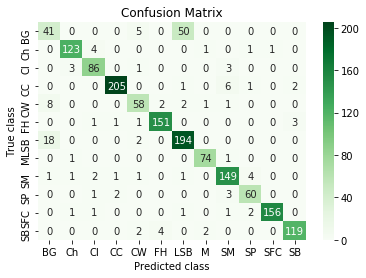

In [83]:
import seaborn as sns

fig, ax = plt.subplots(1)
ax = sns.heatmap(cnf_matrix, ax=ax, cmap=plt.cm.Greens, annot=True, fmt='g')
ax.set_xticklabels(abbreviation)
ax.set_yticklabels(abbreviation)
plt.title('Confusion Matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class')
fig.savefig('Confusion matrix.png', dpi=300)
plt.show();

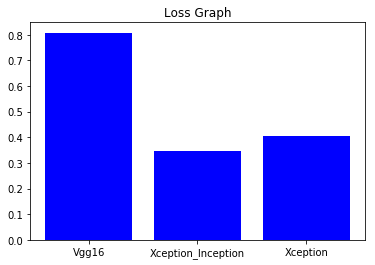

In [47]:

plt.bar(list(compare_loss.keys()), compare_loss.values(), color='b')
plt.xticks(range(0,3),list(compare_loss.keys()))
plt.title('Loss Graph')
plt.show()

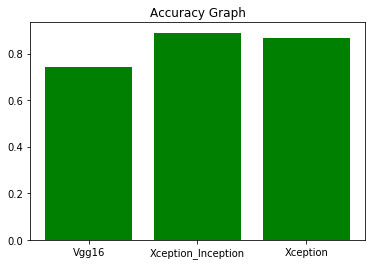

In [48]:
plt.bar(list(compare_accuracy.keys()), compare_accuracy.values(), color='g')
plt.xticks(range(0,3),list(compare_accuracy.keys()))
plt.title('Accuracy Graph')
plt.show()

### Create Test data submission

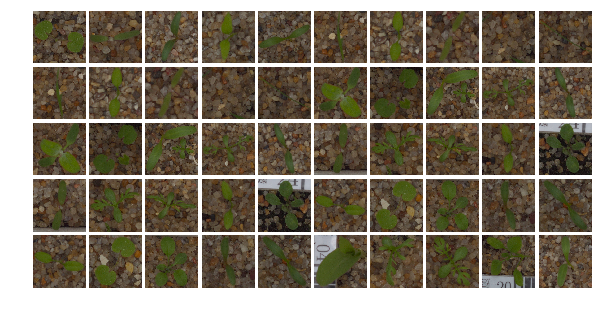

In [49]:
## show some test images 
import mpl_toolkits.axes_grid1

fig = plt.figure(1, figsize=(10, 10))
grid = mpl_toolkits.axes_grid1.ImageGrid(fig, 111, nrows_ncols=(5, 10), 
                                             axes_pad=0.05)
i = 0
for j in range(5):
    for filepath in test['filepath'].values[j*5:j*5+10]:
        ax = grid[i]
        img = read_img(filepath, (224, 224))
        ax.imshow(img.astype(np.uint8))
        ax.axis('off')
        i += 1
        
plt.show();

In [50]:
INPUT_SIZE = 299
POOLING = 'avg'
x_test = np.zeros((len(test), INPUT_SIZE, INPUT_SIZE, 3), dtype='float32')

for i, img_id in tqdm(enumerate(test['file'])):
    img = read_img(img_id, (INPUT_SIZE, INPUT_SIZE))
    x = xception.preprocess_input(np.expand_dims(img.copy().astype(np.float), axis=0)) # preprocessing data for Xception model
    x_test[i] = x
print('test Images shape: {} size: {:,}'.format(x_test.shape, x_test.size))

794it [00:06, 122.61it/s]


test Images shape: (794, 299, 299, 3) size: 212,953,182


In [43]:
xception_bottleneck = xception.Xception(weights='imagenet', include_top=False, pooling=POOLING)
test_x_bf = xception_bottleneck.predict(x_test, batch_size=32, verbose=1)
print('Xception test bottleneck features shape: {} size: {:,}'.format(test_x_bf.shape, test_x_bf.size))

print('save Xception train bottleneck features and labels for later ')
np.save(os.path.join(data_save_model,'train_x_bf.npy'), train_x_bf)

794/794 [==============================] - ETA: 16:4 - ETA: 18:0 - ETA: 17:4 - ETA: 17:1 - ETA: 16:0 - ETA: 14:4 - ETA: 13:2 - ETA: 12:1 - ETA: 11:1 - ETA: 10:2 - ETA: 9:3 - ETA: 8: - ETA: 7: - ETA: 7: - ETA: 6: - ETA: 5: - ETA: 5: - ETA: 4: - ETA: 3: - ETA: 3: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 30s - 944s 1s/step
Xception test bottleneck features shape: (794, 2048) size: 1,626,112


In [52]:
inception_bottleneck = inception_v3.InceptionV3(weights='imagenet', include_top=False, pooling=POOLING)
test_i_bf = inception_bottleneck.predict(x_test, batch_size=32, verbose=1)
print('InceptionV3 test bottleneck features shape: {} size: {:,}'.format(test_i_bf.shape, test_i_bf.size))

print('save InceptionV3 train bottleneck features and labels for later ')
np.save(os.path.join(data_save_model,'train_i_bf.npy'), test_i_bf)

794/794 [==============================] - ETA: 8: - ETA: 8: - ETA: 7: - ETA: 7: - ETA: 7: - ETA: 6: - ETA: 6: - ETA: 6: - ETA: 5: - ETA: 5: - ETA: 5: - ETA: 4: - ETA: 4: - ETA: 4: - ETA: 3: - ETA: 3: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 38s - ETA: 17 - 527s 664ms/step
InceptionV3 test bottleneck features shape: (794, 2048) size: 1,626,112
save InceptionV3 train bottleneck features and labels for later 


In [56]:
# load bottleneck features and labels
test_x_bf = np.load(os.path.join(data_save_model,'test_x_bf.npy'))
# test_i_bf = np.load(os.path.join(data_save_model,'test_i_bf.npy'))

print('Test Xception bottleneck features shape: {} size: {:,}'.format(test_x_bf.shape, test_x_bf.size))
#print('InceptionV3 test bottleneck features shape: {} size: {:,}'.format(test_i_bf.shape, test_i_bf.size))

Test Xception bottleneck features shape: (794, 2048) size: 1,626,112


In [57]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=147)
logreg.fit(train_x_bf, Y_train_val)
valid_probs = logreg.predict_proba(valid_x_bf)
valid_preds = logreg.predict(valid_x_bf)
compare_loss['Xception']=log_loss(Y_val, valid_probs)
compare_accuracy['Xception']=accuracy_score(Y_vali_val, valid_preds)
print('Validation Xception LogLoss {}'.format(compare_loss['Xception']))
print('Validation Xception Accuracy {}'.format(compare_accuracy['Xception']))

Validation Xception LogLoss 0.4069318232911793
Validation Xception Accuracy 0.8673469387755102


In [58]:
test_preds = logreg.predict(test_x_bf)
print('y_test_pred_class_logreg.shape = ', test_preds.shape)

y_test_pred_class_logreg.shape =  (794,)


In [ ]:
logreg.predict(test_x_bf)


In [88]:
valid_preds

array([9, 3, 1, ..., 1, 7, 5], dtype=int64)

In [59]:
test['category_id'] = test_preds
test['species'] = [species[c] for c in test_preds]
test[['file', 'species']].to_csv('Test_lable_submission.csv', index=False)
labels = pd.read_csv(join(os.getcwd(), 'Test_lable_submission.csv'))

In [53]:
test.shape

(794, 4)

In [62]:
labels.head(2)

file          species
0  0021e90e4.png  Shepherds Purse
1  003d61042.png     Common wheat

### Summary of Predicted test lable

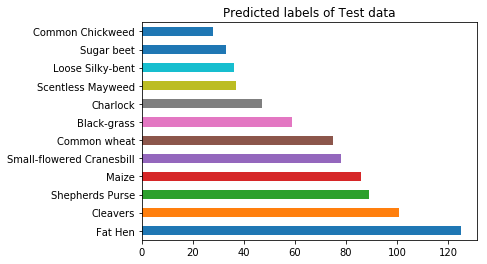

In [60]:
labels['species'].value_counts().plot(kind='barh', title='Predicted labels of Test data')